This program will predict if a student will pass based on students grades on assessments.

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [34]:
# Upload data.
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Sourcegrades.csv')
# To print the first seven rows.
df.head(7)

Saving Sourcegrades.csv to Sourcegrades.csv


,q1,q2,q3,q4,q5,test1,test2,test3,test4,test5,test
0,5,6,3,5,8,2,4,2,4,1,0
1,5,3,7,4,3,5,6,5,3,5,0
2,1,5,9,3,7,3,3,8,4,1,0
3,4,9,6,8,8,2,1,8,4,1,0
4,2,3,5,6,1,3,1,2,9,6,0
5,9,3,7,1,2,8,7,0,6,4,0
6,3,6,8,5,4,0,6,1,4,9,0


In [35]:
# Set data to a array.
dataset = df.values
dataset

array([[ 5,  6,  3, ...,  4,  1,  0],
       [ 5,  3,  7, ...,  3,  5,  0],
       [ 1,  5,  9, ...,  4,  1,  0],
       ...,
       [ 1,  4,  1, ...,  5,  1,  0],
       [ 5,  5,  7, ..., 10,  4,  0],
       [ 2, 10,  3, ...,  5,  7,  0]])

In [36]:
# Get the rows from the columns 0 to 10 not including 10.
x = dataset[:,0:10]
# Get the rows from the column at position 10.
y = dataset[:,10]

In [37]:
# Now use the mininum-maximum scaler so all the values are between 0 and 1 inclusive.
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.5, 0.6, 0.3, ..., 0.2, 0.4, 0.1],
       [0.5, 0.3, 0.7, ..., 0.5, 0.3, 0.5],
       [0.1, 0.5, 0.9, ..., 0.8, 0.4, 0.1],
       ...,
       [0.1, 0.4, 0.1, ..., 1. , 0.5, 0.1],
       [0.5, 0.5, 0.7, ..., 0.5, 1. , 0.4],
       [0.2, 1. , 0.3, ..., 1. , 0.5, 0.7]])

In [38]:
# Set 80 percen training and 20 percent (10% test and 10% validating)
x_train,x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test,y_val_and_test, test_size = 0.5)
# The training has 167 data point, validation has 21 data points and the variables have 10 input features.
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(167, 10) (21, 10) (21, 10) (167,) (21,) (21,)


In [39]:
# We make the model architecture here.
model = Sequential()
model.add(Dense(units = 12, activation = 'relu', input_dim = 10))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [40]:
# The funtion measures how well the model was, and then improves using the optimizers.
#model.compile(optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.compile(optimizer='sgd',loss = 'binary_crossentropy', metrics=['accuracy'])

In [41]:
#Now we train the data.
hist = model.fit(x_train,y_train,
                 batch_size=32, epochs=100, validation_data=(x_val,y_val))

Epoch 1/100
6/6 [==============================] - 1s 77ms/step - loss: 0.9017 - accuracy: 0.0479 - val_loss: 0.8065 - val_accuracy: 0.0952
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.8153 - accuracy: 0.1377 - val_loss: 0.7406 - val_accuracy: 0.1905
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.7535 - accuracy: 0.3293 - val_loss: 0.6916 - val_accuracy: 0.6190
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7046 - accuracy: 0.5868 - val_loss: 0.6549 - val_accuracy: 0.8571
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6685 - accuracy: 0.7186 - val_loss: 0.6261 - val_accuracy: 0.9524
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6394 - accuracy: 0.8084 - val_loss: 0.6016 - val_accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6143 - accuracy: 0.8982 - val_loss: 0.5794 - val_accuracy: 1.0000
Epoch 8/100
6/6 [=========

In [42]:
model.evaluate(x_test,y_test)[1]

1/1 [==============================] - 0s 22ms/step - loss: 0.0430 - accuracy: 1.0000


1.0

In [43]:
# Predict.
prediction = model.predict(x_test)
print(prediction)
'''for y in prediction:
  y.tolist()
  prediction = [1 if p>=.70 else 0 for p in y]'''

prediction = [1 if y>=.70 else 0 for y in prediction]
print("The predictions",prediction)
print("The answer",y_test)

[[0.05388179]
 [0.04767501]
 [0.02992636]
 [0.05062264]
 [0.02676019]
 [0.03565231]
 [0.0551877 ]
 [0.06401983]
 [0.03889582]
 [0.03248712]
 [0.03604233]
 [0.04565355]
 [0.05874309]
 [0.03254342]
 [0.04358658]
 [0.04294202]
 [0.0347642 ]
 [0.02159795]
 [0.04393786]
 [0.04526877]
 [0.04265881]]
The predictions [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The answer [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


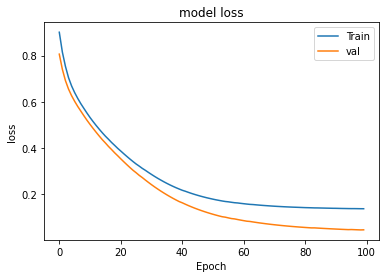

In [44]:
# Visualization
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'])

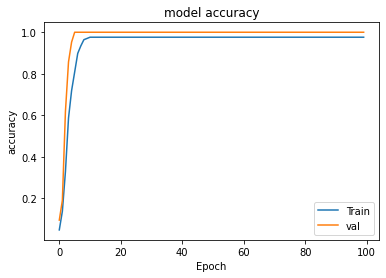

In [45]:
# Visualization
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'])

# Import the target course!
As you may see, I made quizz 4 have values 0, as if the students did not have to take that quiz in the target course. This was done to mimic the approach the research study algorithm did when learning features were not identical in terms of how many of each feature there are.

In [46]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('grades copy.csv')
df.head(7)

Saving Targetgrades.csv to Targetgrades.csv


,q1,q2,q3,q4,q5,test1,test2,test3,test4,test5,grade,average:,Unnamed: 12
0,7,9,8,0,10,5,9,9,7,9,1,1,8.111111
1,9,1,10,0,3,4,2,9,0,2,0,0,4.444444
2,4,5,6,0,6,9,1,10,2,1,0,0,4.888889
3,1,10,8,0,7,8,2,8,2,3,0,0,5.444444
4,8,5,6,0,8,6,2,7,1,6,0,0,5.444444
5,9,1,1,0,10,9,8,0,3,5,0,0,5.111111
6,8,9,10,0,9,9,3,3,0,0,0,0,5.666667


In [47]:
dataset = df.values
dataset

array([[ 7.        ,  9.        ,  8.        , ...,  1.        ,
         1.        ,  8.11111111],
       [ 9.        ,  1.        , 10.        , ...,  0.        ,
         0.        ,  4.44444444],
       [ 4.        ,  5.        ,  6.        , ...,  0.        ,
         0.        ,  4.88888889],
       ...,
       [ 8.        ,  0.        ,  5.        , ...,  0.        ,
         0.        ,  5.11111111],
       [ 6.        ,  3.        ,  7.        , ...,  0.        ,
         0.        ,  5.77777778],
       [ 6.        ,  7.        ,  9.        , ...,  0.        ,
         1.        ,  7.66666667]])

In [48]:
# Get the rows.
x = dataset[:,0:10]
y = dataset[:,10]

In [49]:
# Now use the mininum-maximum scaler
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.7, 0.9, 0.8, ..., 0.9, 0.7, 0.9],
       [0.9, 0.1, 1. , ..., 0.9, 0. , 0.2],
       [0.4, 0.5, 0.6, ..., 1. , 0.2, 0.1],
       ...,
       [0.8, 0. , 0.5, ..., 0.4, 0.2, 0.8],
       [0.6, 0.3, 0.7, ..., 0.5, 0.1, 0.4],
       [0.6, 0.7, 0.9, ..., 1. , 1. , 0.9]])

In [50]:
# Set 50 percent training and 20 percent (10% test and 10% validating)
x_train,x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale,y,test_size=0.5)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test,y_val_and_test, test_size = 0.5)
# The training has 6 data point, validation has 1 data points and the variables have 10.
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(104, 10) (52, 10) (53, 10) (104,) (52,) (53,)


In [51]:
#Now we train the data.
hist = model.fit(x_train,y_train,
                 batch_size=32, epochs=50, validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 0s 56ms/step - loss: 0.1875 - accuracy: 0.9615 - val_loss: 0.1127 - val_accuracy: 0.9808
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1872 - accuracy: 0.9615 - val_loss: 0.1127 - val_accuracy: 0.9808
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1872 - accuracy: 0.9615 - val_loss: 0.1127 - val_accuracy: 0.9808
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1871 - accuracy: 0.9615 - val_loss: 0.1127 - val_accuracy: 0.9808
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1870 - accuracy: 0.9615 - val_loss: 0.1129 - val_accuracy: 0.9808
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1868 - accuracy: 0.9615 - val_loss: 0.1131 - val_accuracy: 0.9808
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1865 - accuracy: 0.9615 - val_loss: 0.1130 - val_accuracy: 0.9808
Epoch 8/50
4/4 [===========

In [52]:
model.evaluate(x_test,y_test)[1]

2/2 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9811


0.9811320900917053

In [53]:
# Predict.
prediction = model.predict(x_test)
print(prediction)
'''for y in prediction:
  y.tolist()
  prediction = [1 if p>=.85 else 0 for p in y]'''

prediction = [1 if y>=.70 else 0 for y in prediction]
print("The predictions",prediction)
print("The answer",y_test)

[[0.03202334]
 [0.03876871]
 [0.03410584]
 [0.05934113]
 [0.03848273]
 [0.0394049 ]
 [0.03655866]
 [0.06056231]
 [0.04066217]
 [0.03890637]
 [0.03975713]
 [0.0378544 ]
 [0.05062306]
 [0.07114312]
 [0.059095  ]
 [0.06512946]
 [0.04343009]
 [0.06528583]
 [0.05174831]
 [0.04880258]
 [0.04202038]
 [0.03517261]
 [0.05571526]
 [0.0389778 ]
 [0.03121287]
 [0.05392095]
 [0.03624678]
 [0.04162896]
 [0.04205593]
 [0.04849091]
 [0.05899581]
 [0.04062855]
 [0.03486127]
 [0.03953454]
 [0.03051043]
 [0.04818287]
 [0.04961908]
 [0.03869307]
 [0.06994855]
 [0.03141677]
 [0.04480523]
 [0.06113604]
 [0.04642975]
 [0.02516639]
 [0.07952529]
 [0.06099182]
 [0.06635007]
 [0.04062498]
 [0.02459553]
 [0.04581946]
 [0.03928071]
 [0.04227373]
 [0.02462628]]
The predictions [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The answer [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [54]:
#Now save the model to train later if we want.
# https://stackoverflow.com/questions/42666046/loading-a-trained-keras-model-and-continue-training
model.save('./MyModel_tf',save_format='tf')

INFO:tensorflow:Assets written to: ./MyModel_tf/assets


In [55]:
!zip -r /content/MyModel_tf.zip /content/MyModel_tf/

updating: content/MyModel_tf/ (stored 0%)
updating: content/MyModel_tf/saved_model.pb (deflated 88%)
updating: content/MyModel_tf/keras_metadata.pb (deflated 87%)
updating: content/MyModel_tf/assets/ (stored 0%)
updating: content/MyModel_tf/variables/ (stored 0%)
updating: content/MyModel_tf/variables/variables.data-00000-of-00001 (deflated 59%)
updating: content/MyModel_tf/variables/variables.index (deflated 54%)
